## Imports necessarios

In [1]:
import pandas as pd
import numpy as np
import random
from ag import alg_genetico
from pso import alg_pso
from aco import alg_aco

## Leitura e tratamento dos dados

In [2]:
nba = pd.read_csv("data/NBA_Dataset.csv")

In [3]:
nba = nba.fillna(0)

In [4]:
def expand_positions(df):
    new_rows = []  
    for index, row in df.iterrows():
        positions = row['pos'].split('-')
        for pos in positions:
            new_row = row.copy()
            new_row['pos'] = pos
            new_rows.append(new_row)
    return pd.DataFrame(new_rows)

mask = nba['pos'].str.contains('-')  
expanded_rows = expand_positions(nba[mask])
single_position_rows = nba[~mask]  

nba_new = pd.concat([single_position_rows, expanded_rows]).reset_index(drop=True)

In [5]:
nba_new = nba_new[nba_new["season"] >= 1995]

In [6]:
nba_PF = nba_new[nba_new["pos"] == "PF"]
nba_SG = nba_new[nba_new["pos"] == "SG"]
nba_C = nba_new[nba_new["pos"] == "C"]
nba_PG = nba_new[nba_new["pos"] == "PG"]
nba_SF = nba_new[nba_new["pos"] == "SF"]

In [7]:
candidatos_PF = nba_PF[nba_PF["award_share"] > 0]
candidatos_SG = nba_SG[nba_SG["award_share"] > 0]
candidatos_C = nba_C[nba_C["award_share"] > 0]
candidatos_PG = nba_PG[nba_PG["award_share"] > 0]
candidatos_SF = nba_SF[nba_SF["award_share"] > 0]

## PFs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [8]:
correlations_PF = candidatos_PF.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [9]:
print("melhor combinacao:\n", correlations_PF.head(11)[1:])

melhor combinacao:
 ws_per_48    0.637408
per          0.624887
bpm          0.614481
vorp         0.603499
ws           0.580688
obpm         0.517667
dbpm         0.491093
ows          0.487315
fg2_per_g    0.436224
fta_per_g    0.434466
Name: award_share, dtype: float64


In [10]:
melhor_resultado_PF = correlations_PF.head(11)[1:].sum()
print(melhor_resultado_PF)

5.427727894482805


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 19.55510449409485
Melhor aptidão: 4.750868002386429
Melhores atributos:
['ws_per_48', 'per', 'bpm', 'vorp', 'fg2_per_g', 'fta_per_g', 'usg_pct', 'ast_pct', 'ft_per_g', 'blk_per_g']
Geração: 201


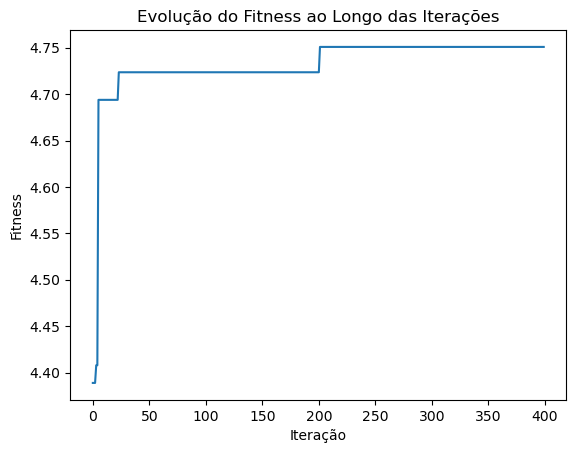

Acuracia: 0.8752959055327013


In [11]:
combinacao, resultado_atual = alg_aco(candidatos_PF, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 36.377112865448
Melhor aptidão: 4.8579565783349565
Melhores atributos:
['per', 'vorp', 'ws', 'dbpm', 'ows', 'fta_per_g', 'win_loss_pct', 'dws', 'mov', 'pts_per_g']
Geração: 5


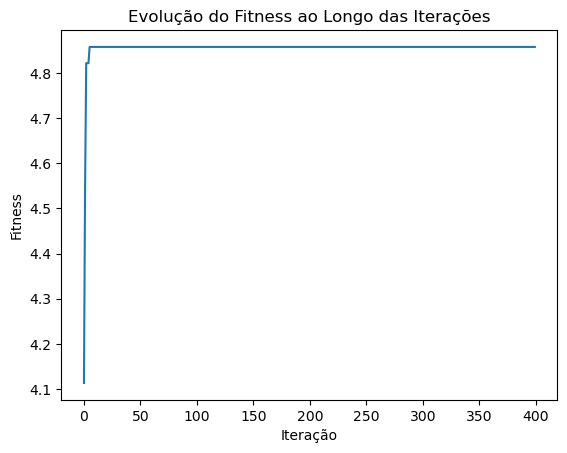

Acuracia: 0.895025814258852


In [12]:
combinacao, resultado_atual = alg_pso(candidatos_PF, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 23.718981742858887
Melhor aptidão: 5.427727894482805
Melhores atributos:
['ws_per_48', 'per', 'bpm', 'vorp', 'ws', 'obpm', 'dbpm', 'ows', 'fg2_per_g', 'fta_per_g']
Geração: 142


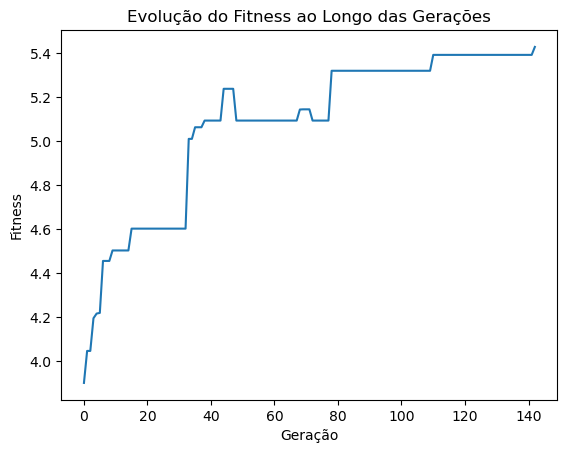

Acuracia: 1.0


In [13]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 57.46326470375061
Melhor aptidão: 5.414284977695612
Melhores atributos:
['ws_per_48', 'per', 'bpm', 'vorp', 'ws', 'obpm', 'dbpm', 'ows', 'fg2_per_g', 'win_loss_pct']
Geração: 74


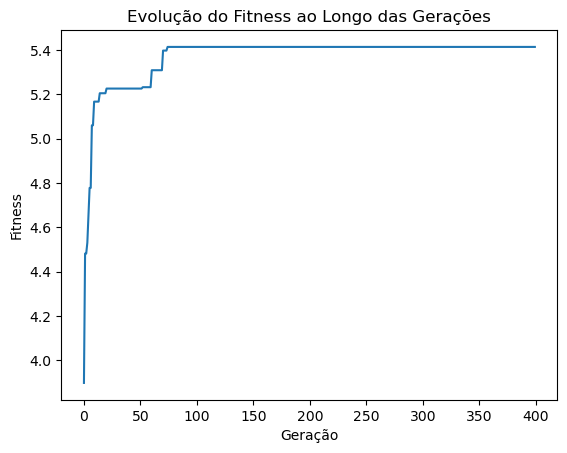

Acuracia: 0.997523288372496


In [14]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 23.07525110244751
Melhor aptidão: 5.427727894482805
Melhores atributos:
['ws_per_48', 'per', 'bpm', 'vorp', 'ws', 'obpm', 'dbpm', 'ows', 'fg2_per_g', 'fta_per_g']
Geração: 153


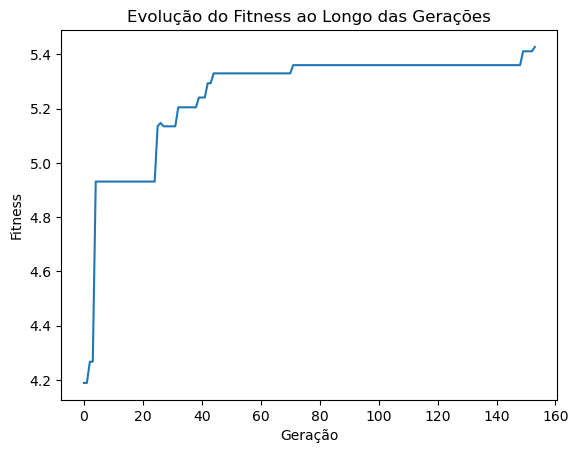

Acuracia: 1.0


In [15]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 59.92720079421997
Melhor aptidão: 5.414284977695612
Melhores atributos:
['ws_per_48', 'per', 'bpm', 'vorp', 'ws', 'obpm', 'dbpm', 'ows', 'fg2_per_g', 'win_loss_pct']
Geração: 168


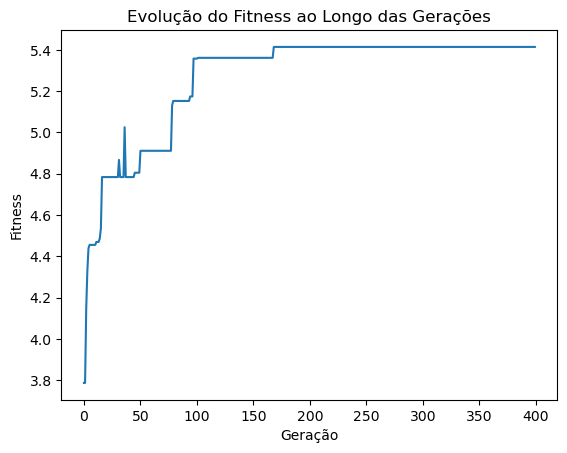

Acuracia: 0.997523288372496


In [16]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 25.21002984046936
Melhor aptidão: 5.427727894482805
Melhores atributos:
['ws_per_48', 'per', 'bpm', 'vorp', 'ws', 'obpm', 'dbpm', 'ows', 'fg2_per_g', 'fta_per_g']
Geração: 162


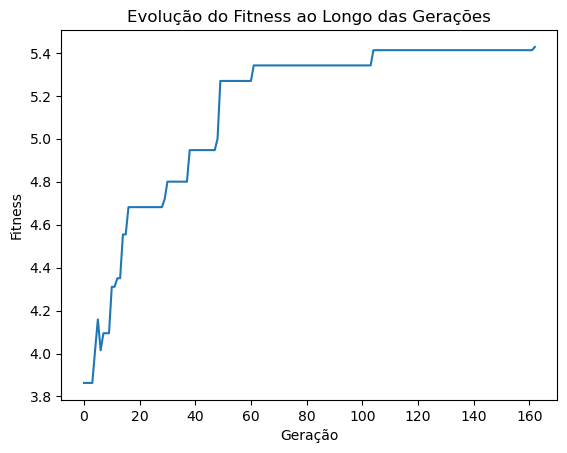

Acuracia: 1.0


In [17]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 48.80971550941467
Melhor aptidão: 5.427727894482805
Melhores atributos:
['ws_per_48', 'per', 'bpm', 'vorp', 'ws', 'obpm', 'dbpm', 'ows', 'fg2_per_g', 'fta_per_g']
Geração: 324


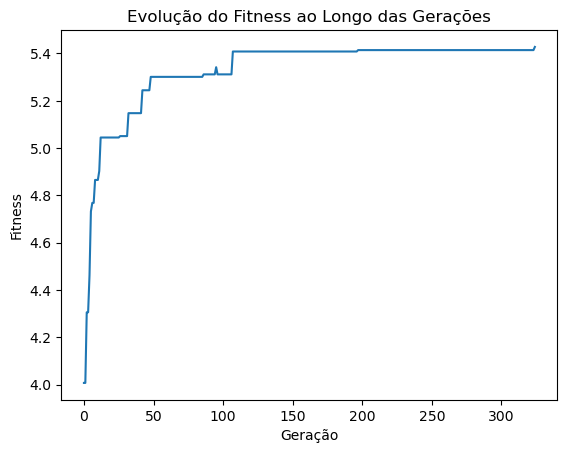

Acuracia: 1.0


In [18]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 37.00819158554077
Melhor aptidão: 5.427727894482805
Melhores atributos:
['ws_per_48', 'per', 'bpm', 'vorp', 'ws', 'obpm', 'dbpm', 'ows', 'fg2_per_g', 'fta_per_g']
Geração: 237


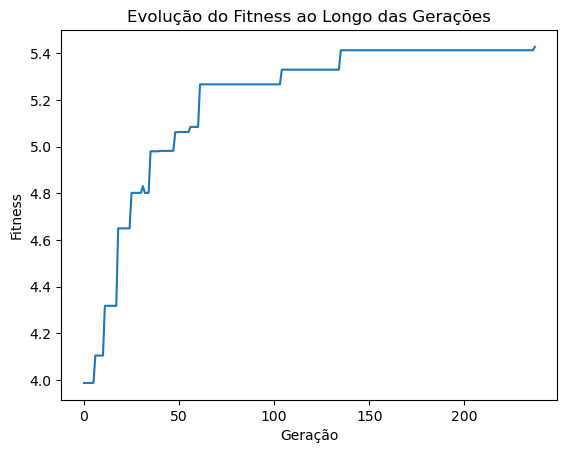

Acuracia: 1.0


In [19]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

## SGs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [20]:
correlations_SG = candidatos_SG.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [21]:
print("melhor combinacao:\n", correlations_SG.head(11)[1:])

melhor combinacao:
 ws           0.611478
vorp         0.598568
pts_per_g    0.579833
ws_per_48    0.546589
fg_per_g     0.545524
per          0.539505
obpm         0.529449
bpm          0.519257
ows          0.506632
usg_pct      0.494567
Name: award_share, dtype: float64


In [22]:
melhor_resultado_SG = correlations_SG.head(11)[1:].sum()
print(melhor_resultado_SG)

5.471401291971539


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 18.888882637023926
Melhor aptidão: 4.615411733284537
Melhores atributos:
['ws', 'vorp', 'pts_per_g', 'fg_per_g', 'bpm', 'ows', 'fga_per_g', 'fg2_per_g', 'gs', 'fta_per_fga_pct']
Geração: 70


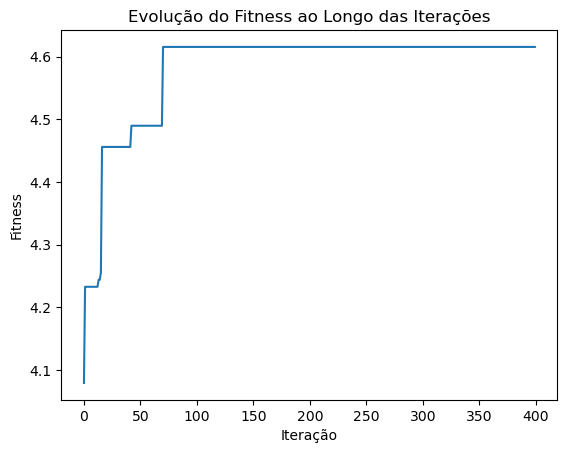

Acuracia: 0.8435520421536183


In [23]:
combinacao, resultado_atual = alg_aco(candidatos_SG, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 33.541133880615234
Melhor aptidão: 5.2658940971272665
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'fg_per_g', 'per', 'bpm', 'ows', 'usg_pct', 'dws', 'ft_per_g']
Geração: 9


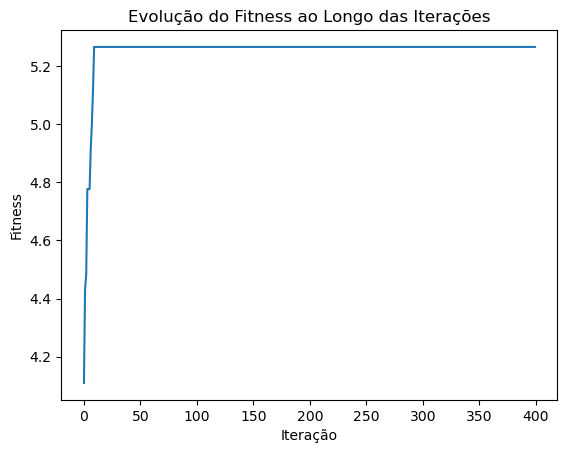

Acuracia: 0.9624397510111673


In [24]:
combinacao, resultado_atual = alg_pso(candidatos_SG, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 60.89394426345825
Melhor aptidão: 5.449993958175454
Melhores atributos:
['ws', 'vorp', 'pts_per_g', 'ws_per_48', 'fg_per_g', 'per', 'obpm', 'bpm', 'usg_pct', 'fga_per_g']
Geração: 177


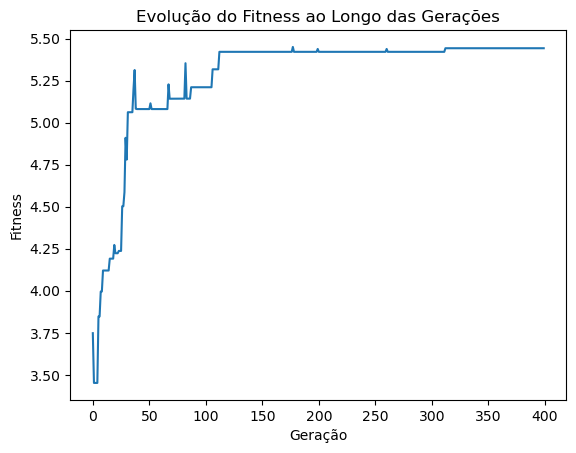

Acuracia: 0.996087412958085


In [25]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 57.60822939872742
Melhor aptidão: 5.409327574127287
Melhores atributos:
['ws', 'vorp', 'pts_per_g', 'ws_per_48', 'fg_per_g', 'obpm', 'bpm', 'ows', 'usg_pct', 'fga_per_g']
Geração: 177


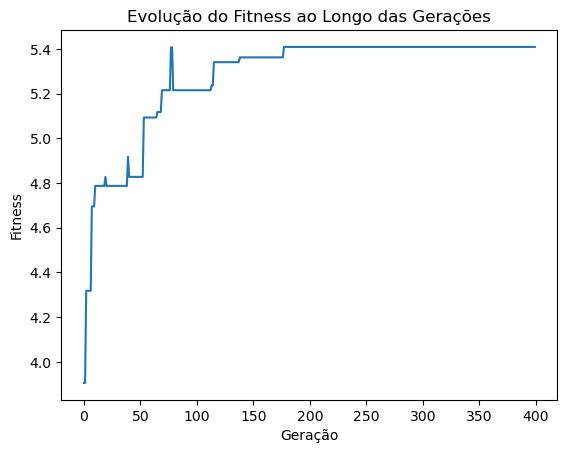

Acuracia: 0.988654877510934


In [26]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 30.471184968948364
Melhor aptidão: 5.471401291971539
Melhores atributos:
['ws', 'vorp', 'pts_per_g', 'ws_per_48', 'fg_per_g', 'per', 'obpm', 'bpm', 'ows', 'usg_pct']
Geração: 182


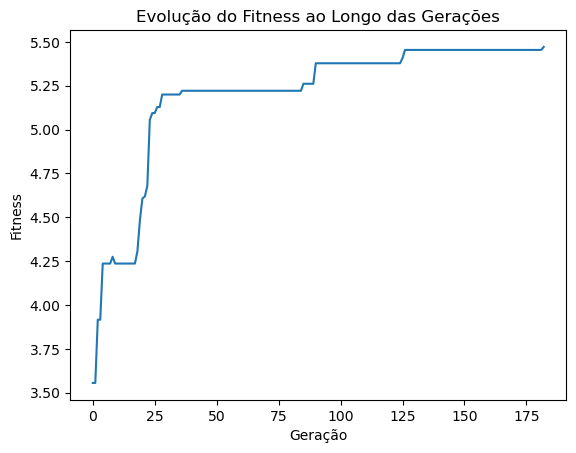

Acuracia: 1.0


In [27]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 21.390957355499268
Melhor aptidão: 5.471401291971539
Melhores atributos:
['ws', 'vorp', 'pts_per_g', 'ws_per_48', 'fg_per_g', 'per', 'obpm', 'bpm', 'ows', 'usg_pct']
Geração: 132


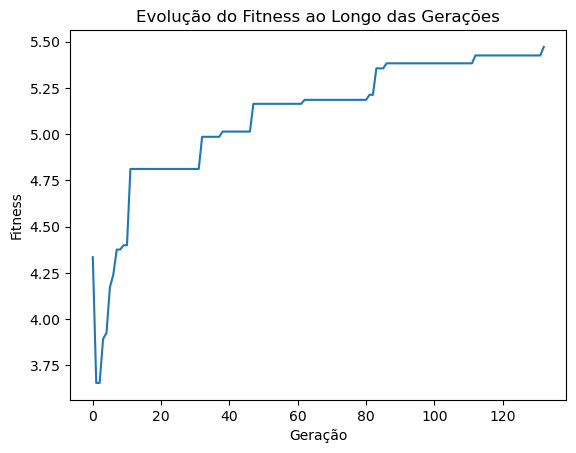

Acuracia: 1.0


In [28]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 67.21304678916931
Melhor aptidão: 5.442200795004174
Melhores atributos:
['ws', 'vorp', 'pts_per_g', 'ws_per_48', 'fg_per_g', 'per', 'obpm', 'bpm', 'usg_pct', 'fga_per_g']
Geração: 221


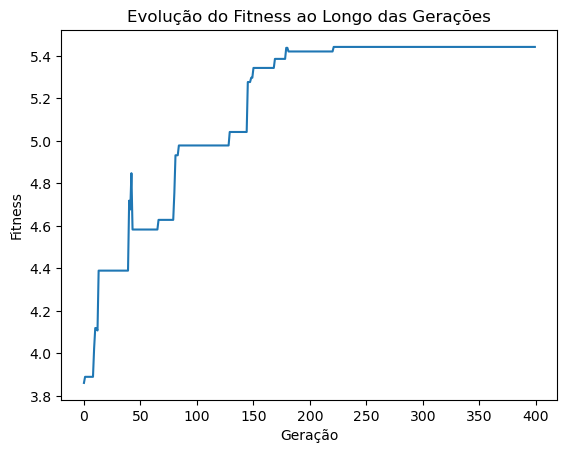

Acuracia: 0.9946630679401616


In [29]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 64.17475056648254
Melhor aptidão: 5.454265273013333
Melhores atributos:
['ws', 'vorp', 'pts_per_g', 'ws_per_48', 'fg_per_g', 'per', 'obpm', 'bpm', 'ows', 'fga_per_g']
Geração: 194


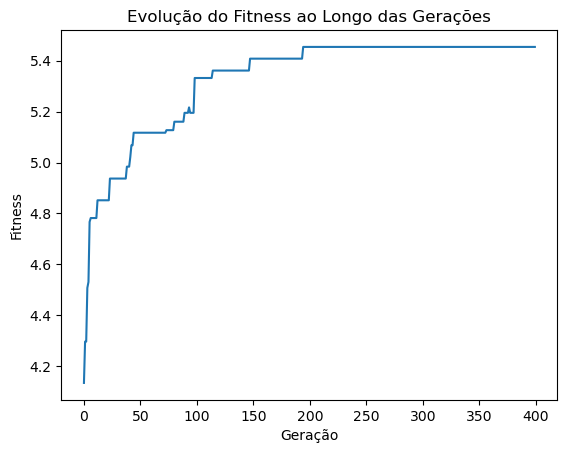

Acuracia: 0.996868074914675


In [30]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 57.619521141052246
Melhor aptidão: 5.449993958175454
Melhores atributos:
['ws', 'vorp', 'pts_per_g', 'ws_per_48', 'fg_per_g', 'per', 'obpm', 'bpm', 'ows', 'dws']
Geração: 230


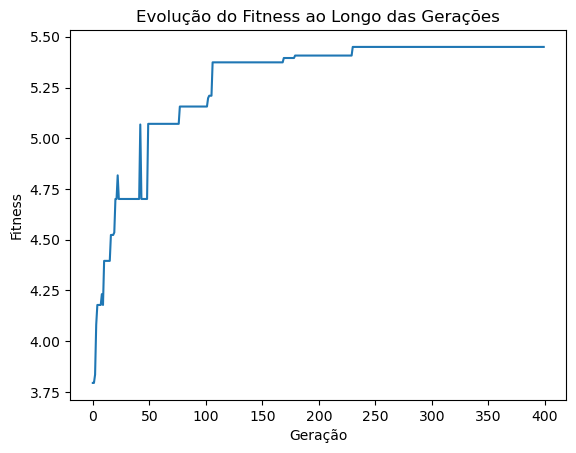

Acuracia: 0.996087412958085


In [31]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

## Cs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [32]:
correlations_C = candidatos_C.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [33]:
print("melhor combinacao:\n", correlations_C.head(11)[1:])

melhor combinacao:
 vorp         0.703794
bpm          0.695354
per          0.656104
obpm         0.637799
ws_per_48    0.611784
ws           0.567184
ows          0.538898
pts_per_g    0.500857
fg_per_g     0.468494
fta_per_g    0.463793
Name: award_share, dtype: float64


In [34]:
melhor_resultado_C = correlations_C.head(11)[1:].sum()
print(melhor_resultado_C)

5.844060537747029


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 17.461525917053223
Melhor aptidão: 5.241143842271026
Melhores atributos:
['vorp', 'bpm', 'per', 'obpm', 'ws_per_48', 'ows', 'fg_per_g', 'tov_per_g', 'fg_pct', 'orb_pct']
Geração: 153


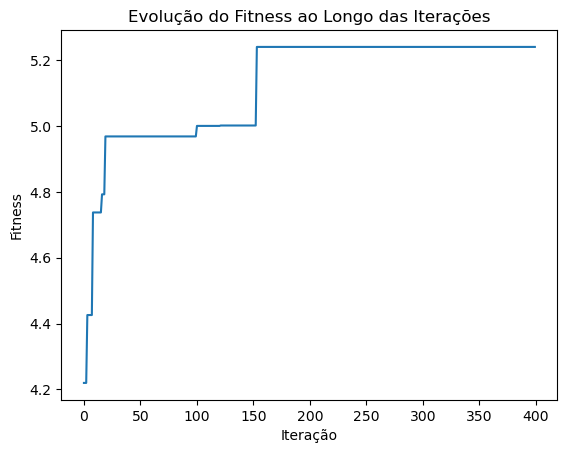

Acuracia: 0.896832571876739


In [35]:
combinacao, resultado_atual = alg_aco(candidatos_C, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 39.47085475921631
Melhor aptidão: 4.854028323777805
Melhores atributos:
['per', 'obpm', 'ws_per_48', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g', 'ast_per_g', 'ts_pct', 'trb_pct']
Geração: 1


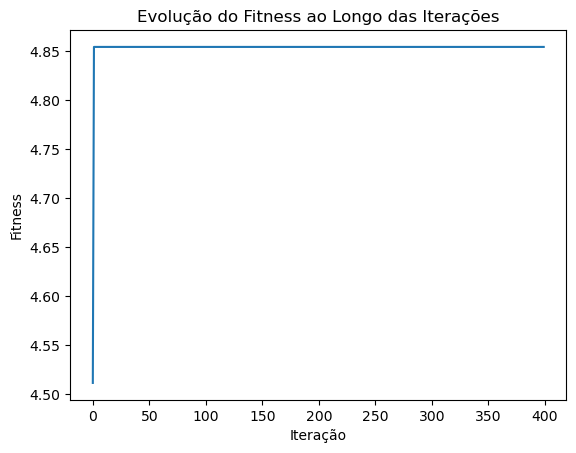

Acuracia: 0.8305917251242412


In [36]:
combinacao, resultado_atual = alg_pso(candidatos_C, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 60.390342473983765
Melhor aptidão: 5.762076160775538
Melhores atributos:
['vorp', 'bpm', 'per', 'obpm', 'ws_per_48', 'ws', 'ows', 'fg_per_g', 'fta_per_g', 'ast_per_g']
Geração: 213


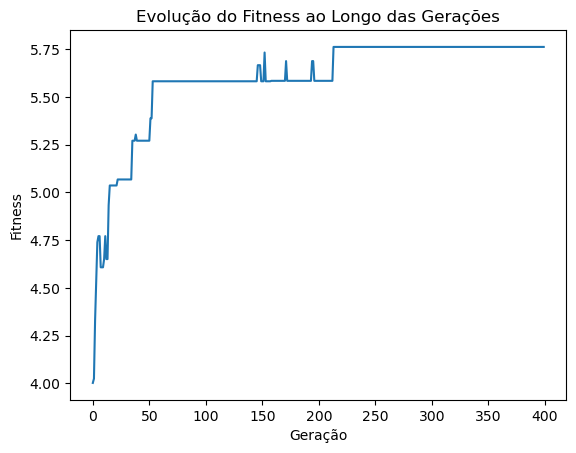

Acuracia: 0.9859713333833642


In [37]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 59.32016658782959
Melhor aptidão: 5.812531491225939
Melhores atributos:
['vorp', 'bpm', 'per', 'obpm', 'ws_per_48', 'ws', 'ows', 'pts_per_g', 'fg_per_g', 'fg2_per_g']
Geração: 258


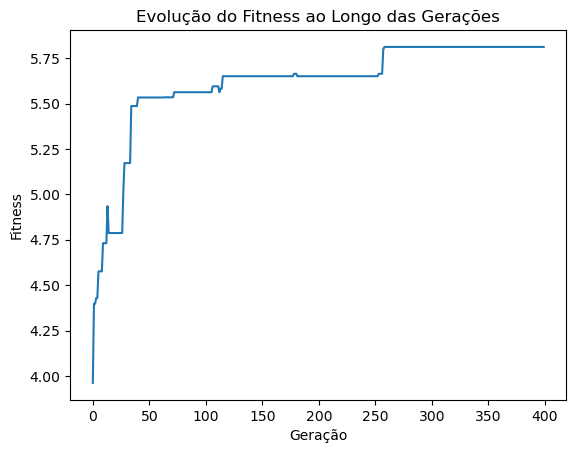

Acuracia: 0.9946049418349721


In [38]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 61.19032382965088
Melhor aptidão: 5.807830494540583
Melhores atributos:
['vorp', 'bpm', 'per', 'obpm', 'ws_per_48', 'ws', 'ows', 'pts_per_g', 'fta_per_g', 'fg2_per_g']
Geração: 339


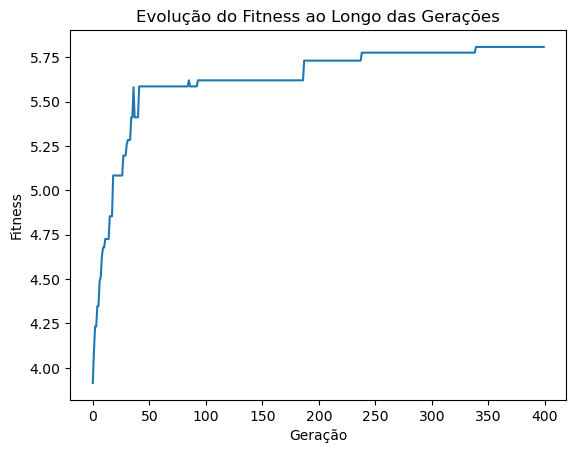

Acuracia: 0.9938005359505716


In [39]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 60.156835079193115
Melhor aptidão: 5.84406053774703
Melhores atributos:
['vorp', 'bpm', 'per', 'obpm', 'ws_per_48', 'ws', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 307


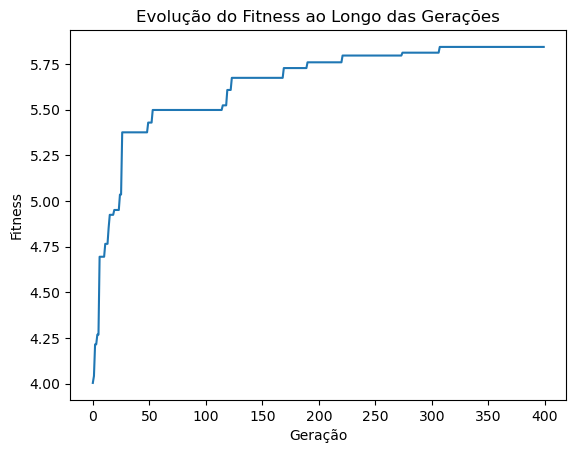

Acuracia: 1.0000000000000002


In [40]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 61.85520339012146
Melhor aptidão: 5.807830494540583
Melhores atributos:
['vorp', 'bpm', 'per', 'obpm', 'ws_per_48', 'ws', 'ows', 'pts_per_g', 'fta_per_g', 'fg2_per_g']
Geração: 303


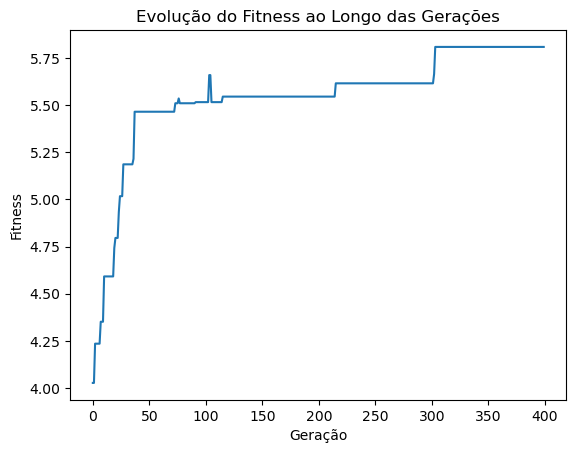

Acuracia: 0.9938005359505716


In [41]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 60.26070547103882
Melhor aptidão: 5.769849381830334
Melhores atributos:
['vorp', 'bpm', 'per', 'obpm', 'ws_per_48', 'ws', 'ows', 'pts_per_g', 'fg_per_g', 'usg_pct']
Geração: 253


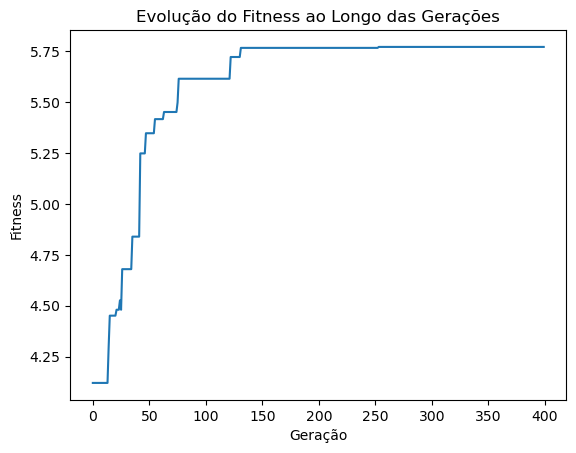

Acuracia: 0.9873014395663149


In [42]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 59.22011733055115
Melhor aptidão: 5.812531491225939
Melhores atributos:
['vorp', 'bpm', 'per', 'obpm', 'ws_per_48', 'ws', 'ows', 'pts_per_g', 'fg_per_g', 'fg2_per_g']
Geração: 298


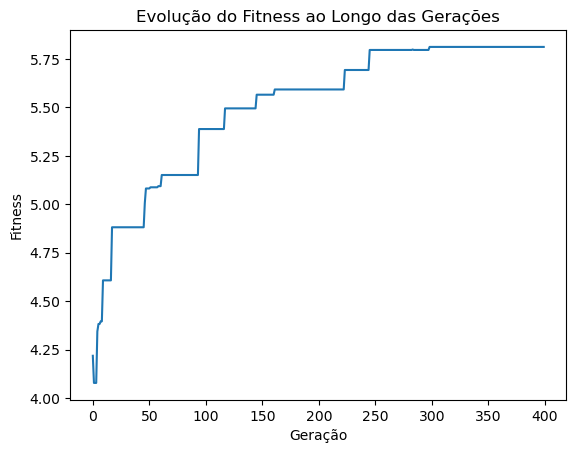

Acuracia: 0.9946049418349721


In [43]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

## PGs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [44]:
correlations_PG = candidatos_PG.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [45]:
print("melhor combinacao:\n", correlations_PG.head(11)[1:])

melhor combinacao:
 vorp         0.551164
bpm          0.517527
obpm         0.497185
per          0.496194
ws           0.474465
ws_per_48    0.446936
ows          0.407343
pts_per_g    0.311187
fg3_per_g    0.309073
tov_per_g    0.307391
Name: award_share, dtype: float64


In [46]:
melhor_resultado_PG = correlations_PG.head(11)[1:].sum()
print(melhor_resultado_PG)

4.318465102827519


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 17.42634153366089
Melhor aptidão: 3.926545222231552
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'fg3_per_g', 'tov_per_g', 'mov_adj', 'ast_pct', 'fga_per_g']
Geração: 366


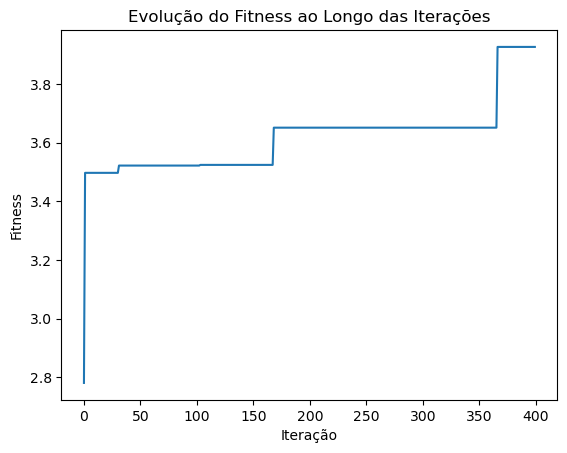

Acuracia: 0.9092455603405578


In [47]:
combinacao, resultado_atual = alg_aco(candidatos_PG, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 33.91898059844971
Melhor aptidão: 4.173400035973421
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'ws_per_48', 'fg3_per_g', 'win_loss_pct', 'fg3a_per_g', 'usg_pct']
Geração: 9


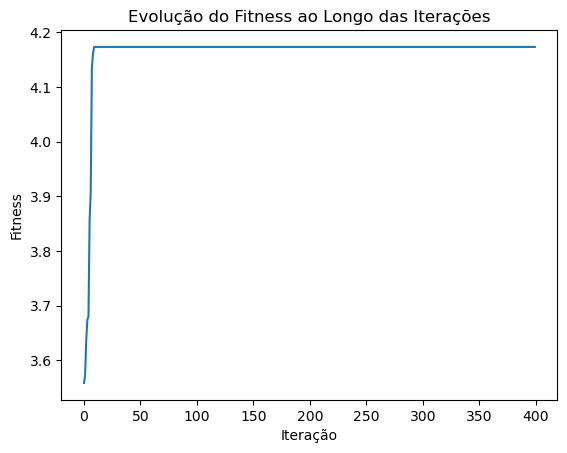

Acuracia: 0.9664081882335656


In [48]:
combinacao, resultado_atual = alg_pso(candidatos_PG, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 60.86249899864197
Melhor aptidão: 4.305290754915749
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'ws_per_48', 'ows', 'pts_per_g', 'fg3_per_g', 'fg3a_per_g']
Geração: 388


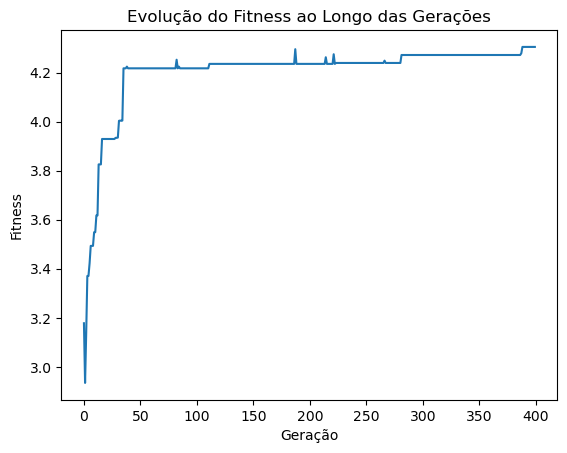

Acuracia: 0.9969492985127647


In [49]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 13.349615335464478
Melhor aptidão: 4.318465102827519
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'ws_per_48', 'ows', 'pts_per_g', 'fg3_per_g', 'tov_per_g']
Geração: 84


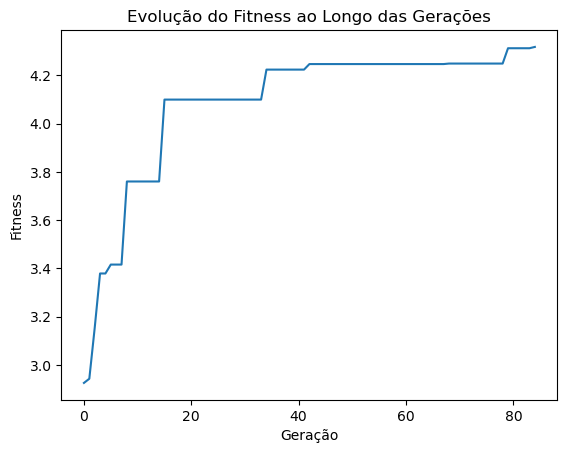

Acuracia: 1.0


In [50]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 61.2866735458374
Melhor aptidão: 4.313019274716586
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'ws_per_48', 'ows', 'pts_per_g', 'tov_per_g', 'win_loss_pct']
Geração: 235


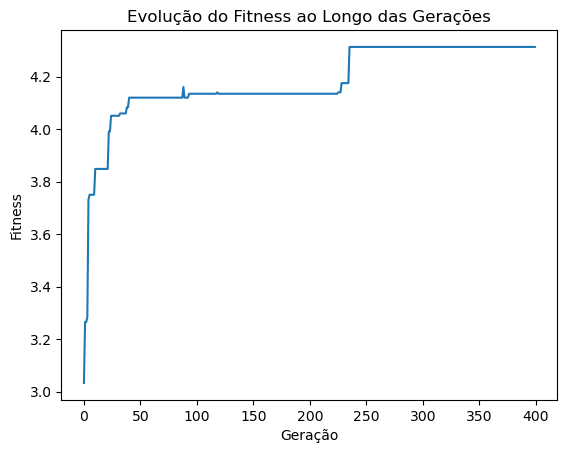

Acuracia: 0.9987389435873021


In [51]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 63.932735204696655
Melhor aptidão: 4.2998449268048144
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'ws_per_48', 'ows', 'pts_per_g', 'win_loss_pct', 'fg_per_g']
Geração: 315


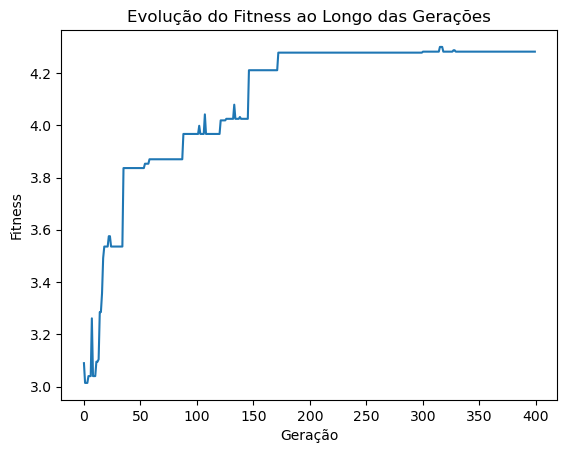

Acuracia: 0.9956882421000663


In [52]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 57.58980345726013
Melhor aptidão: 4.314701814514292
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'ws_per_48', 'ows', 'pts_per_g', 'fg3_per_g', 'win_loss_pct']
Geração: 359


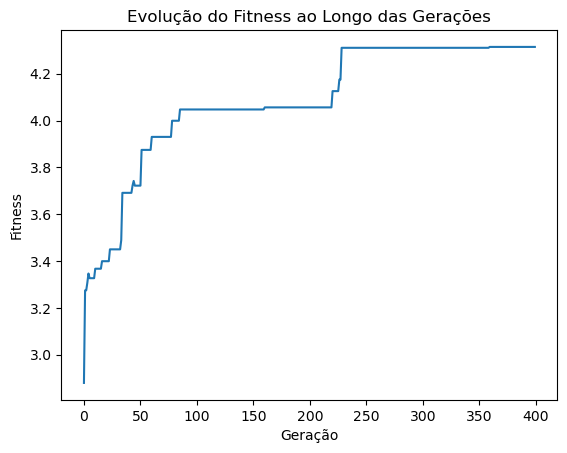

Acuracia: 0.9991285588227256


In [53]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 68.36465167999268
Melhor aptidão: 4.314701814514292
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'ws_per_48', 'ows', 'pts_per_g', 'fg3_per_g', 'win_loss_pct']
Geração: 34


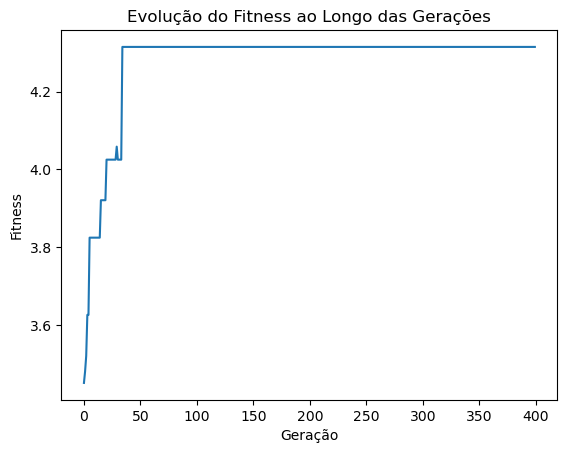

Acuracia: 0.9991285588227256


In [54]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 60.49750852584839
Melhor aptidão: 4.314701814514292
Melhores atributos:
['vorp', 'bpm', 'obpm', 'per', 'ws', 'ws_per_48', 'ows', 'pts_per_g', 'fg3_per_g', 'win_loss_pct']
Geração: 335


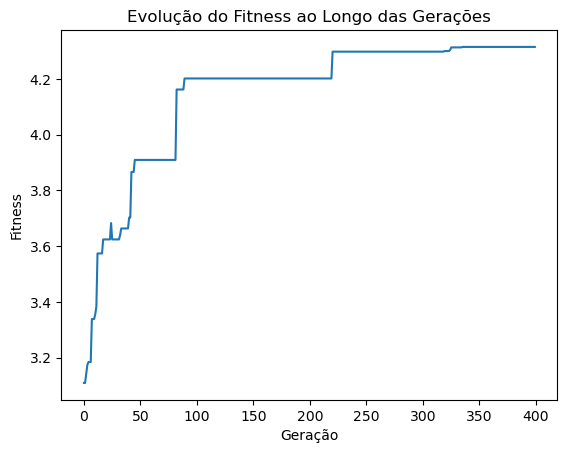

Acuracia: 0.9991285588227256


In [55]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

## SFs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [56]:
correlations_SF = candidatos_SF.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [57]:
print("melhor combinacao:\n", correlations_SF.head(11)[1:])

melhor combinacao:
 ws_per_48    0.759524
ws           0.758894
per          0.752951
ows          0.749802
obpm         0.733045
vorp         0.720604
bpm          0.706046
pts_per_g    0.554050
ft_per_g     0.517414
fta_per_g    0.517116
Name: award_share, dtype: float64


In [58]:
melhor_resultado_SF = correlations_SF.head(11)[1:].sum()
print(melhor_resultado_SF)

6.769445477622228


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 18.353499174118042
Melhor aptidão: 5.956158292817484
Melhores atributos:
['ws_per_48', 'ws', 'per', 'ows', 'vorp', 'bpm', 'pts_per_g', 'fg_per_g', 'ast_pct', 'g']
Geração: 343


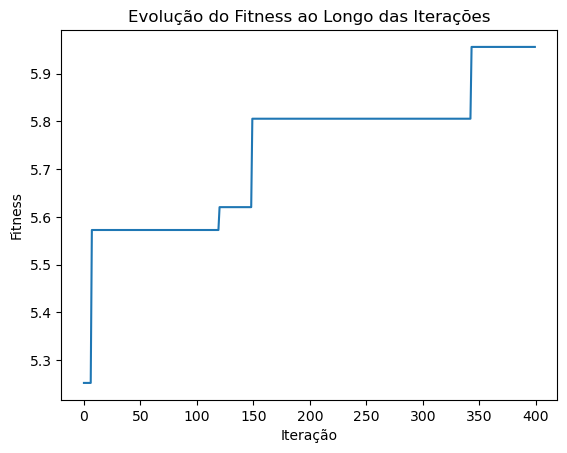

Acuracia: 0.8798591129076629


In [59]:
combinacao, resultado_atual = alg_aco(candidatos_SF, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 33.4187388420105
Melhor aptidão: 5.539299740179695
Melhores atributos:
['ws_per_48', 'ws', 'ows', 'obpm', 'bpm', 'ft_per_g', 'fg_per_g', 'drb_per_g', 'drb_pct', 'ft_pct']
Geração: 1


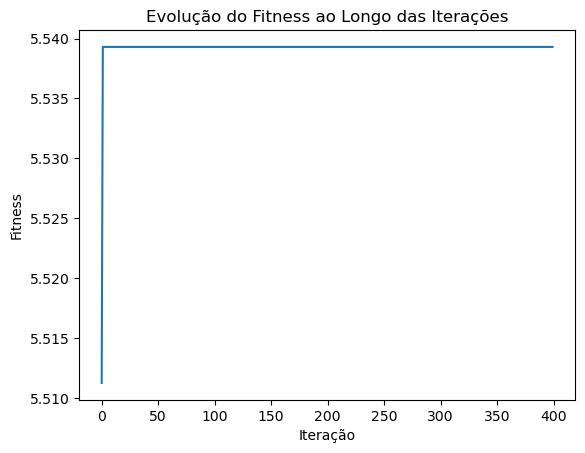

Acuracia: 0.8182796890071677


In [60]:
combinacao, resultado_atual = alg_pso(candidatos_SF, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 60.498374462127686
Melhor aptidão: 6.731514756422348
Melhores atributos:
['ws_per_48', 'ws', 'per', 'ows', 'obpm', 'vorp', 'bpm', 'pts_per_g', 'ft_per_g', 'dbpm']
Geração: 153


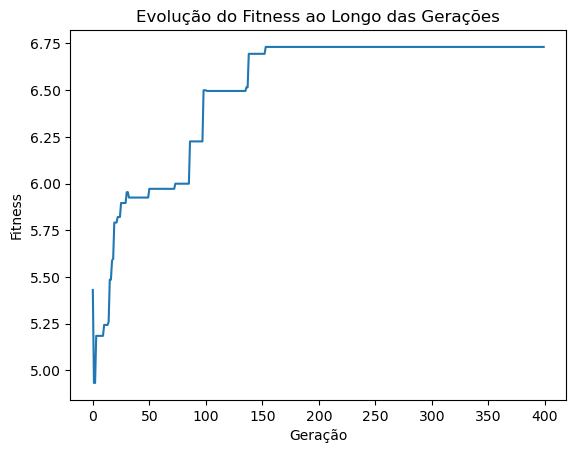

Acuracia: 0.994396775729228


In [61]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 61.66259527206421
Melhor aptidão: 6.769445477622229
Melhores atributos:
['ws_per_48', 'ws', 'per', 'ows', 'obpm', 'vorp', 'bpm', 'pts_per_g', 'ft_per_g', 'fta_per_g']
Geração: 187


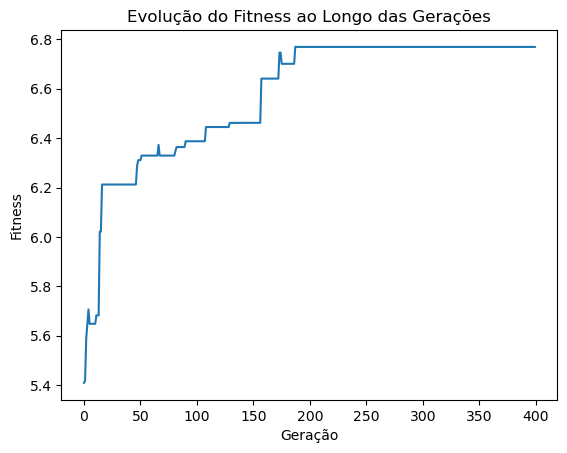

Acuracia: 1.0000000000000002


In [62]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 58.56422758102417
Melhor aptidão: 6.694580634709196
Melhores atributos:
['ws_per_48', 'ws', 'per', 'ows', 'obpm', 'vorp', 'bpm', 'ft_per_g', 'fta_per_g', 'dbpm']
Geração: 273


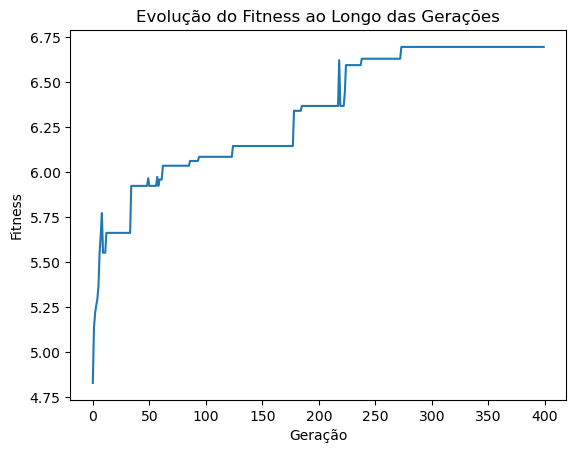

Acuracia: 0.9889407717130578


In [63]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 61.98279547691345
Melhor aptidão: 6.769445477622229
Melhores atributos:
['ws_per_48', 'ws', 'per', 'ows', 'obpm', 'vorp', 'bpm', 'pts_per_g', 'ft_per_g', 'fta_per_g']
Geração: 359


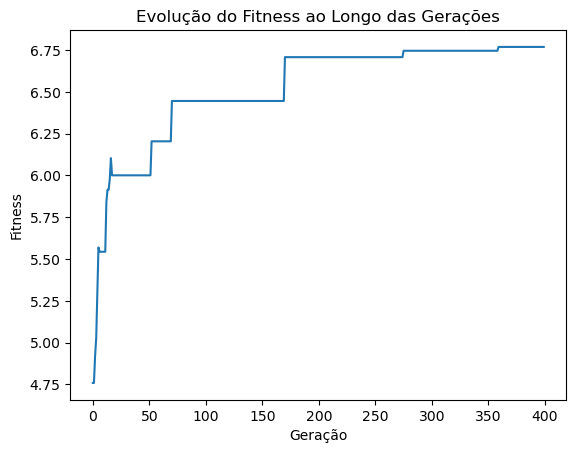

Acuracia: 1.0000000000000002


In [64]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 59.25967192649841
Melhor aptidão: 6.746459205371261
Melhores atributos:
['ws_per_48', 'ws', 'per', 'ows', 'obpm', 'vorp', 'bpm', 'pts_per_g', 'ft_per_g', 'ts_pct']
Geração: 230


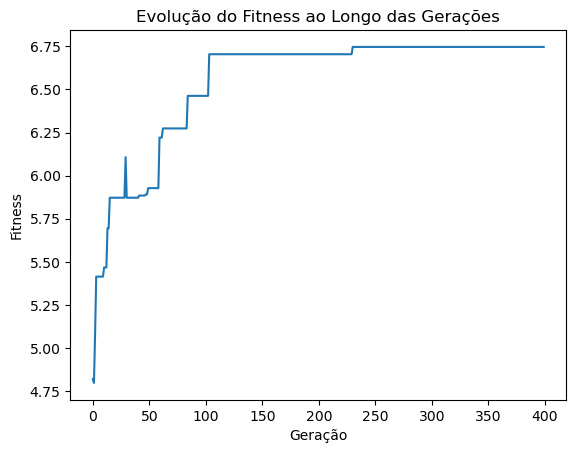

Acuracia: 0.9966044083925407


In [65]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 57.98314142227173
Melhor aptidão: 6.769445477622229
Melhores atributos:
['ws_per_48', 'ws', 'per', 'ows', 'obpm', 'vorp', 'bpm', 'pts_per_g', 'ft_per_g', 'fta_per_g']
Geração: 281


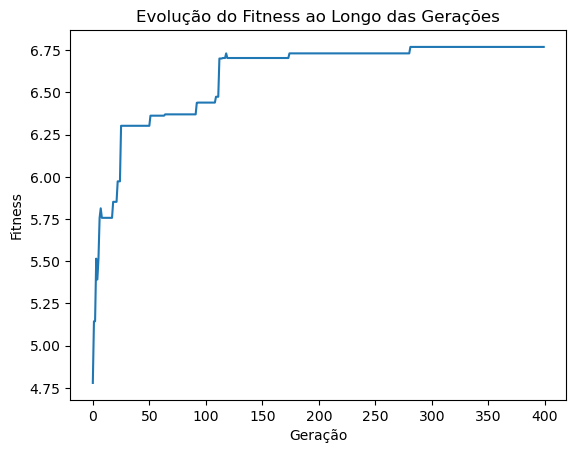

Acuracia: 1.0000000000000002


In [66]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 57.03566384315491
Melhor aptidão: 6.746459205371261
Melhores atributos:
['ws_per_48', 'ws', 'per', 'ows', 'obpm', 'vorp', 'bpm', 'ft_per_g', 'fta_per_g', 'ts_pct']
Geração: 397


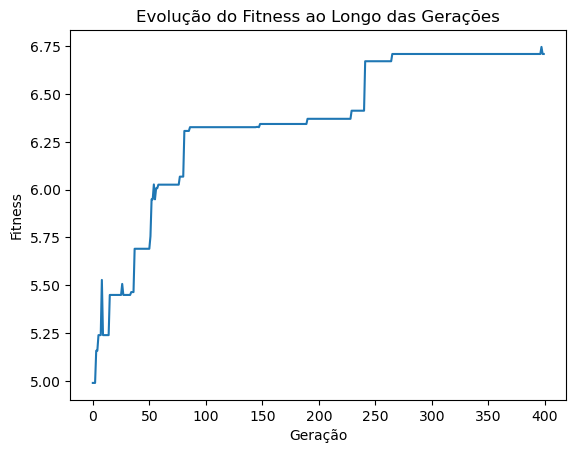

Acuracia: 0.9966044083925407


In [67]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

## Geral

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [68]:
candidatos_geral = nba_new[nba_new["award_share"] > 0]

In [69]:
correlations_geral = candidatos_geral.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [70]:
print("melhor combinacao:\n", correlations_geral.head(11)[1:])

melhor combinacao:
 vorp         0.619367
per          0.605966
bpm          0.600306
ws           0.591700
ws_per_48    0.589697
obpm         0.532479
ows          0.506250
pts_per_g    0.417395
fg_per_g     0.402556
fta_per_g    0.370753
Name: award_share, dtype: float64


In [71]:
melhor_resultado_geral = correlations_geral.head(11)[1:].sum()
print(melhor_resultado_geral)

5.23647014991044


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 19.43335795402527
Melhor aptidão: 4.327695256014677
Melhores atributos:
['vorp', 'bpm', 'ws', 'ws_per_48', 'obpm', 'ows', 'fg_per_g', 'fg2_per_g', 'fg3a_per_g', 'orb_per_g']
Geração: 7


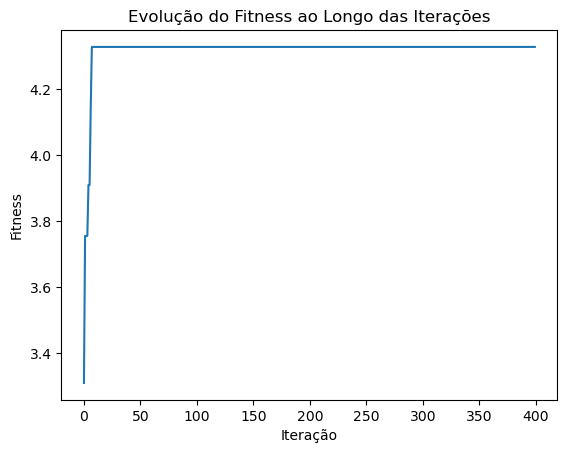

Acuracia: 0.8264527691595251


In [72]:
combinacao, resultado_atual = alg_aco(candidatos_geral, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 37.482683420181274
Melhor aptidão: 4.965409200447159
Melhores atributos:
['vorp', 'per', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g', 'mov']
Geração: 7


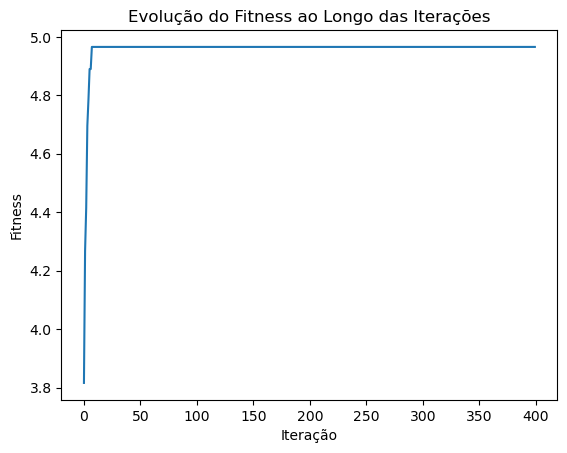

Acuracia: 0.948235941062718


In [73]:
combinacao, resultado_atual = alg_pso(candidatos_geral, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 68.9317467212677
Melhor aptidão: 5.236470149910442
Melhores atributos:
['vorp', 'per', 'bpm', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 382


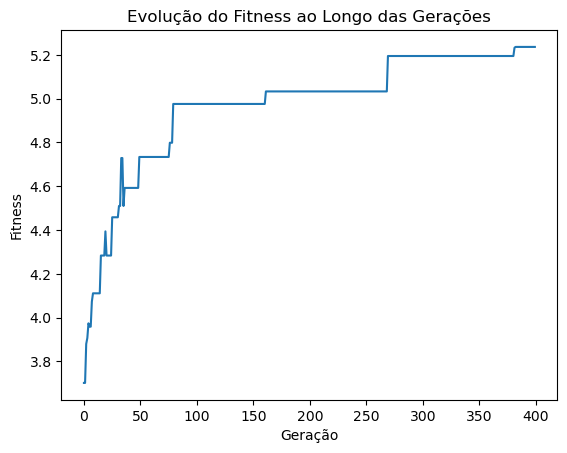

Acuracia: 1.0000000000000004


In [74]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 62.46141028404236
Melhor aptidão: 5.082665940741662
Melhores atributos:
['vorp', 'per', 'bpm', 'ws', 'ws_per_48', 'obpm', 'pts_per_g', 'fg_per_g', 'fta_per_g', 'ft_per_g']
Geração: 358


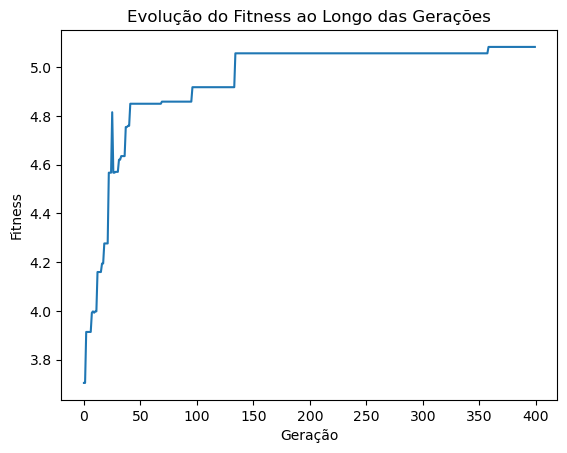

Acuracia: 0.9706282658421325


In [75]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 55.57107353210449
Melhor aptidão: 5.236470149910442
Melhores atributos:
['vorp', 'per', 'bpm', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 357


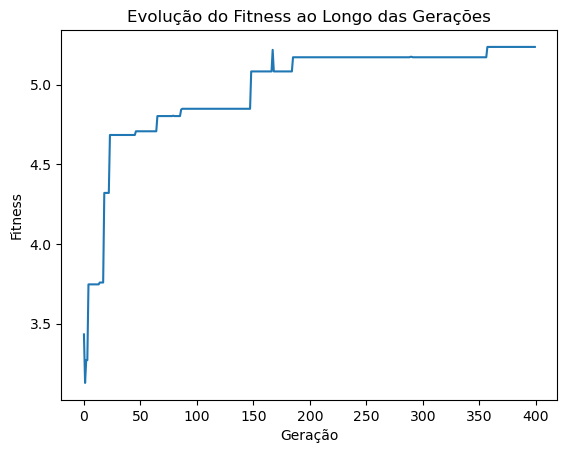

Acuracia: 1.0000000000000004


In [81]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 62.92467904090881
Melhor aptidão: 5.236470149910442
Melhores atributos:
['vorp', 'per', 'bpm', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 295


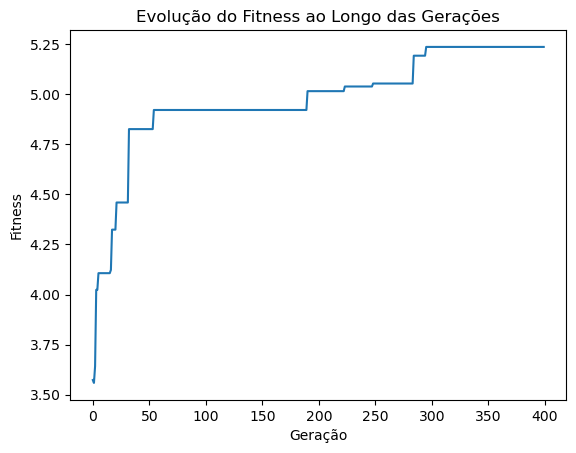

Acuracia: 1.0000000000000004


In [77]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 61.152602672576904
Melhor aptidão: 5.236470149910442
Melhores atributos:
['vorp', 'per', 'bpm', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 174


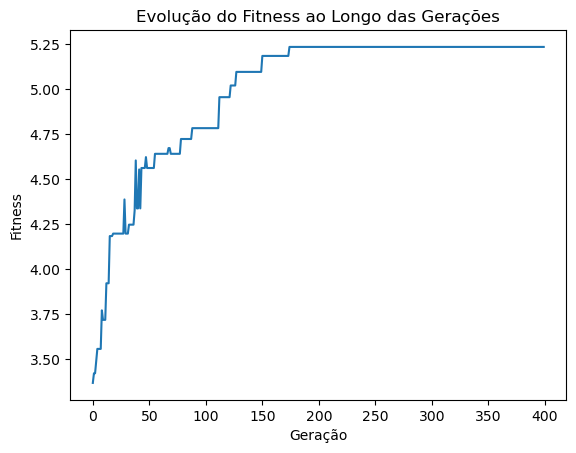

Acuracia: 1.0000000000000004


In [78]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 64.03024649620056
Melhor aptidão: 5.233058360083509
Melhores atributos:
['vorp', 'per', 'bpm', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'usg_pct']
Geração: 393


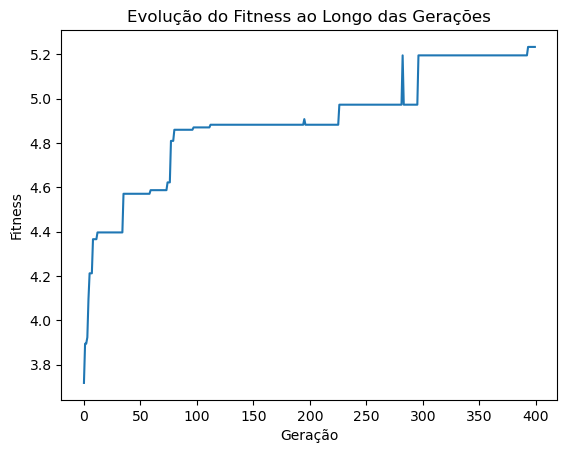

Acuracia: 0.9993484561681328


In [79]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 61.952829360961914
Melhor aptidão: 5.233058360083509
Melhores atributos:
['vorp', 'per', 'bpm', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'usg_pct']
Geração: 269


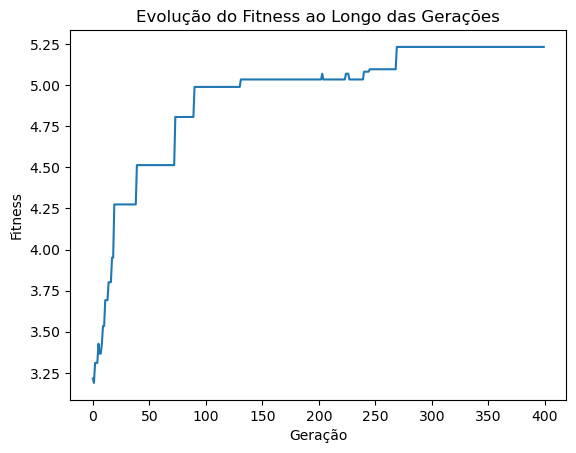

Acuracia: 0.9993484561681328


In [80]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))